In [1]:
import os
os.chdir('/home/jupyter/ntu/csie-cv/hw3')
from PIL import Image
import copy
import numpy as np

def save_image(img, path='./lena.bmp'):
    img_ = Image.fromarray(np.array(img, dtype='uint8'), mode='L')
    img_.save(path)
    return img_

# def binarize(img, height=height, width=width):
#     for y in range(height):
#         for x in range(width):
#             img[y][x] = 255 if img[y][x] >= 128 else 0
#     return img



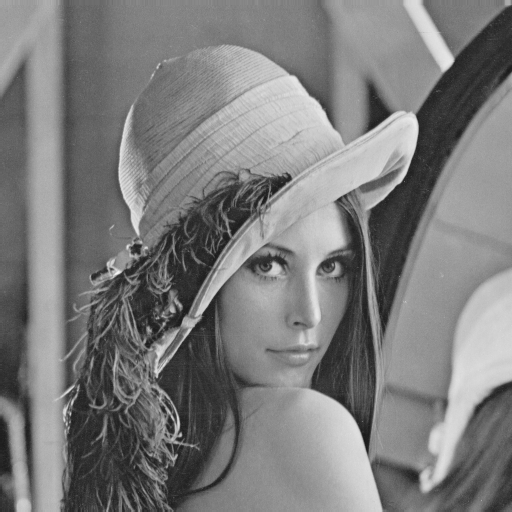

In [2]:
img = Image.open('./lena.bmp')
img

In [3]:
img_array = np.array(img)
width, height = img_array.shape
img_list = img_array.tolist()

# a. histogram

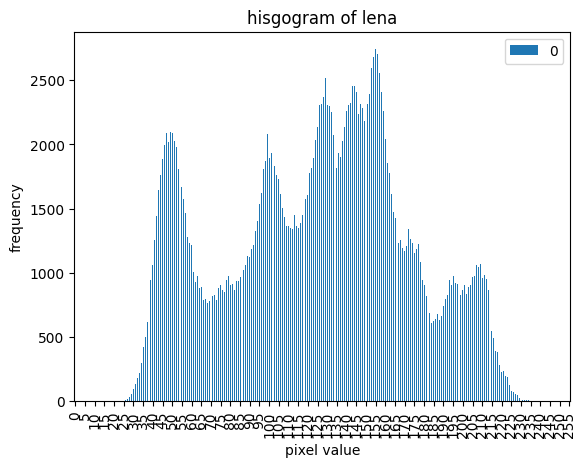

In [4]:
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

def get_histogram(img, hieght=height, width=width):
    histogram = {i:0 for i in range(0, 256)}
    for y in range(height):
        for x in range(width):
            bin = histogram.get(img[y][x], 0)
            histogram[img[y][x]]  = bin + 1
    return histogram

result = copy.deepcopy(img_list)
histogram = get_histogram(result)
histogram = dict(sorted(histogram.items(), key=lambda x: x[0]))
df = pd.DataFrame({k:[v] for k,v in histogram.items()}).T#.plot.bar(x='lab', y='val', rot=0)

ax = df.plot.bar(title='hisgogram of lena', xlabel='pixel value', ylabel='frequency')
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=5))
plt.savefig('histogram.png')

# b. image intensity div by 3, then histogram

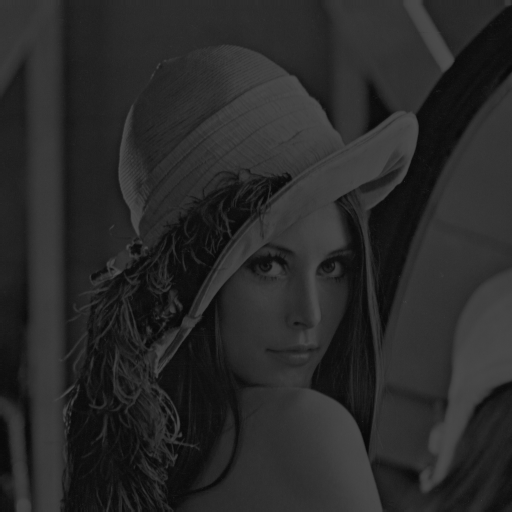

In [5]:
def div_by_3(img, height=height, width=width):
    for y in range(height):
        for x in range(width):
            img[y][x] = img[y][x]//3           
    return img

result = copy.deepcopy(img_list)
result = div_by_3(result)
save_image(result, './lena_div3.bmp')

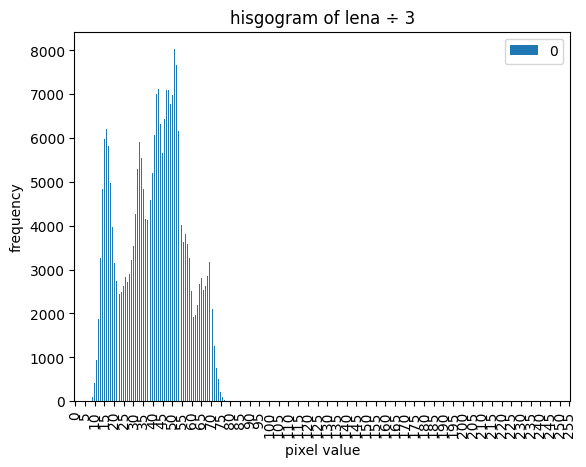

In [6]:
histogram = get_histogram(result)
histogram = dict(sorted(histogram.items(), key=lambda x: x[0]))
df = pd.DataFrame({k:[v] for k,v in histogram.items()}).T

ax = df.plot.bar(title='hisgogram of lena ÷ 3', xlabel='pixel value', ylabel='frequency')
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=5))
plt.savefig('histogram_div3.png')

# c. histogram equalization on b.

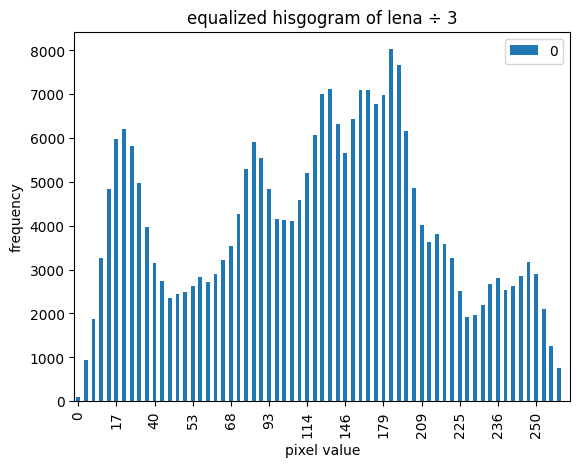

In [7]:
# remove value = 0's key-value pair
for k, v in list(histogram.items()):
    if v == 0:
        del histogram[k]

# sort by key
histogram = sorted(histogram.items(), key = lambda x: x[0])
min_bin, min_bin_count = histogram[0]
histogram = dict(histogram)


# direct map min_bin to 0
equalized_histogram = {i:0 for i in range(0, 256)}
equalized_histogram = {0:min_bin_count}
equalize = {}
cdf = 0

for i, (k, v) in enumerate(histogram.items()):
    # min_bin has already mapped to 0
    if i == 0:
        equalize[k] = 0
        continue

    cdf += v
    hv = round(
        ((cdf - min_bin_count)/(height*width - min_bin_count))*255
        )   
    equalized_histogram[hv] = v
    equalize[k] = hv


equalized_histogram = dict(sorted(equalized_histogram.items(), key=lambda x: x[0]))

df = pd.DataFrame({k:[v] for k,v in equalized_histogram.items()}).T#.plot.bar(x='lab', y='val', rot=0)

ax = df.plot.bar(title='equalized hisgogram of lena ÷ 3', xlabel='pixel value', ylabel='frequency')
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=5))
plt.savefig('equalized_histogram_div3.png')

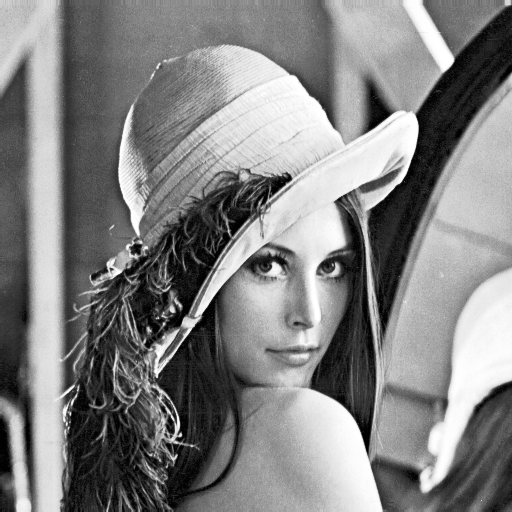

In [8]:
for y in range(height):
    for x in range(width):
        result[y][x] = equalize[result[y][x]]

save_image(result, './lena_div3_equalized.bmp')